In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import pylab as pl
import os
import urllib
import statsmodels.formula.api as smf
import scipy
import scipy.stats
import zipfile
import geopandas as gp
import sys
reload(sys)  
sys.setdefaultencoding('utf8')


### Grader comment: import sys and geopandas as gp missing

In [2]:
urllib.urlretrieve('https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD',os.getenv('PUIDATA')+
                   '/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

('/home/cusp/vmr286/PUIdata/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv',
 <httplib.HTTPMessage instance at 0x7f20a65143f8>)

In [3]:
urllib.urlretrieve('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip',os.getenv("PUIDATA") + "/mn_mappluto_16v2.zip")

('/home/cusp/vmr286/PUIdata/mn_mappluto_16v2.zip',
 <httplib.HTTPMessage instance at 0x7f20a651e560>)

In [4]:
shapefile = zipfile.ZipFile(os.getenv("PUIDATA") + "/mn_mappluto_16v2.zip")
shapefile.extractall(os.getenv("PUIDATA") )

In [5]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")

In [6]:
nrg.columns

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BIN', u'NTA'],
      dtype=

In [7]:
bsize.columns

Index([   u'Borough',      u'Block',        u'Lot',         u'CD',
           u'CT2010',     u'CB2010', u'SchoolDist',    u'Council',
          u'ZipCode',   u'FireComp', u'PolicePrct', u'HealthArea',
        u'SanitBoro', u'SanitDistr',   u'SanitSub',    u'Address',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
         u'Overlay1',   u'Overlay2',    u'SPDist1',    u'SPDist2',
          u'SPDist3',  u'LtdHeight',  u'SplitZone',  u'BldgClass',
          u'LandUse',  u'Easements',  u'OwnerType',  u'OwnerName',
          u'LotArea',   u'BldgArea',    u'ComArea',    u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea',  u'StrgeArea',
       u'FactryArea',  u'OtherArea', u'AreaSource',   u'NumBldgs',
        u'NumFloors',   u'UnitsRes', u'UnitsTotal',   u'LotFront',
         u'LotDepth',  u'BldgFront',  u'BldgDepth',        u'Ext',
         u'ProxCode', u'IrrLotCode',    u'LotType',   u'BsmtCode',
       u'AssessLand',  u'AssessTot', u'ExemptLand',  u'ExemptT

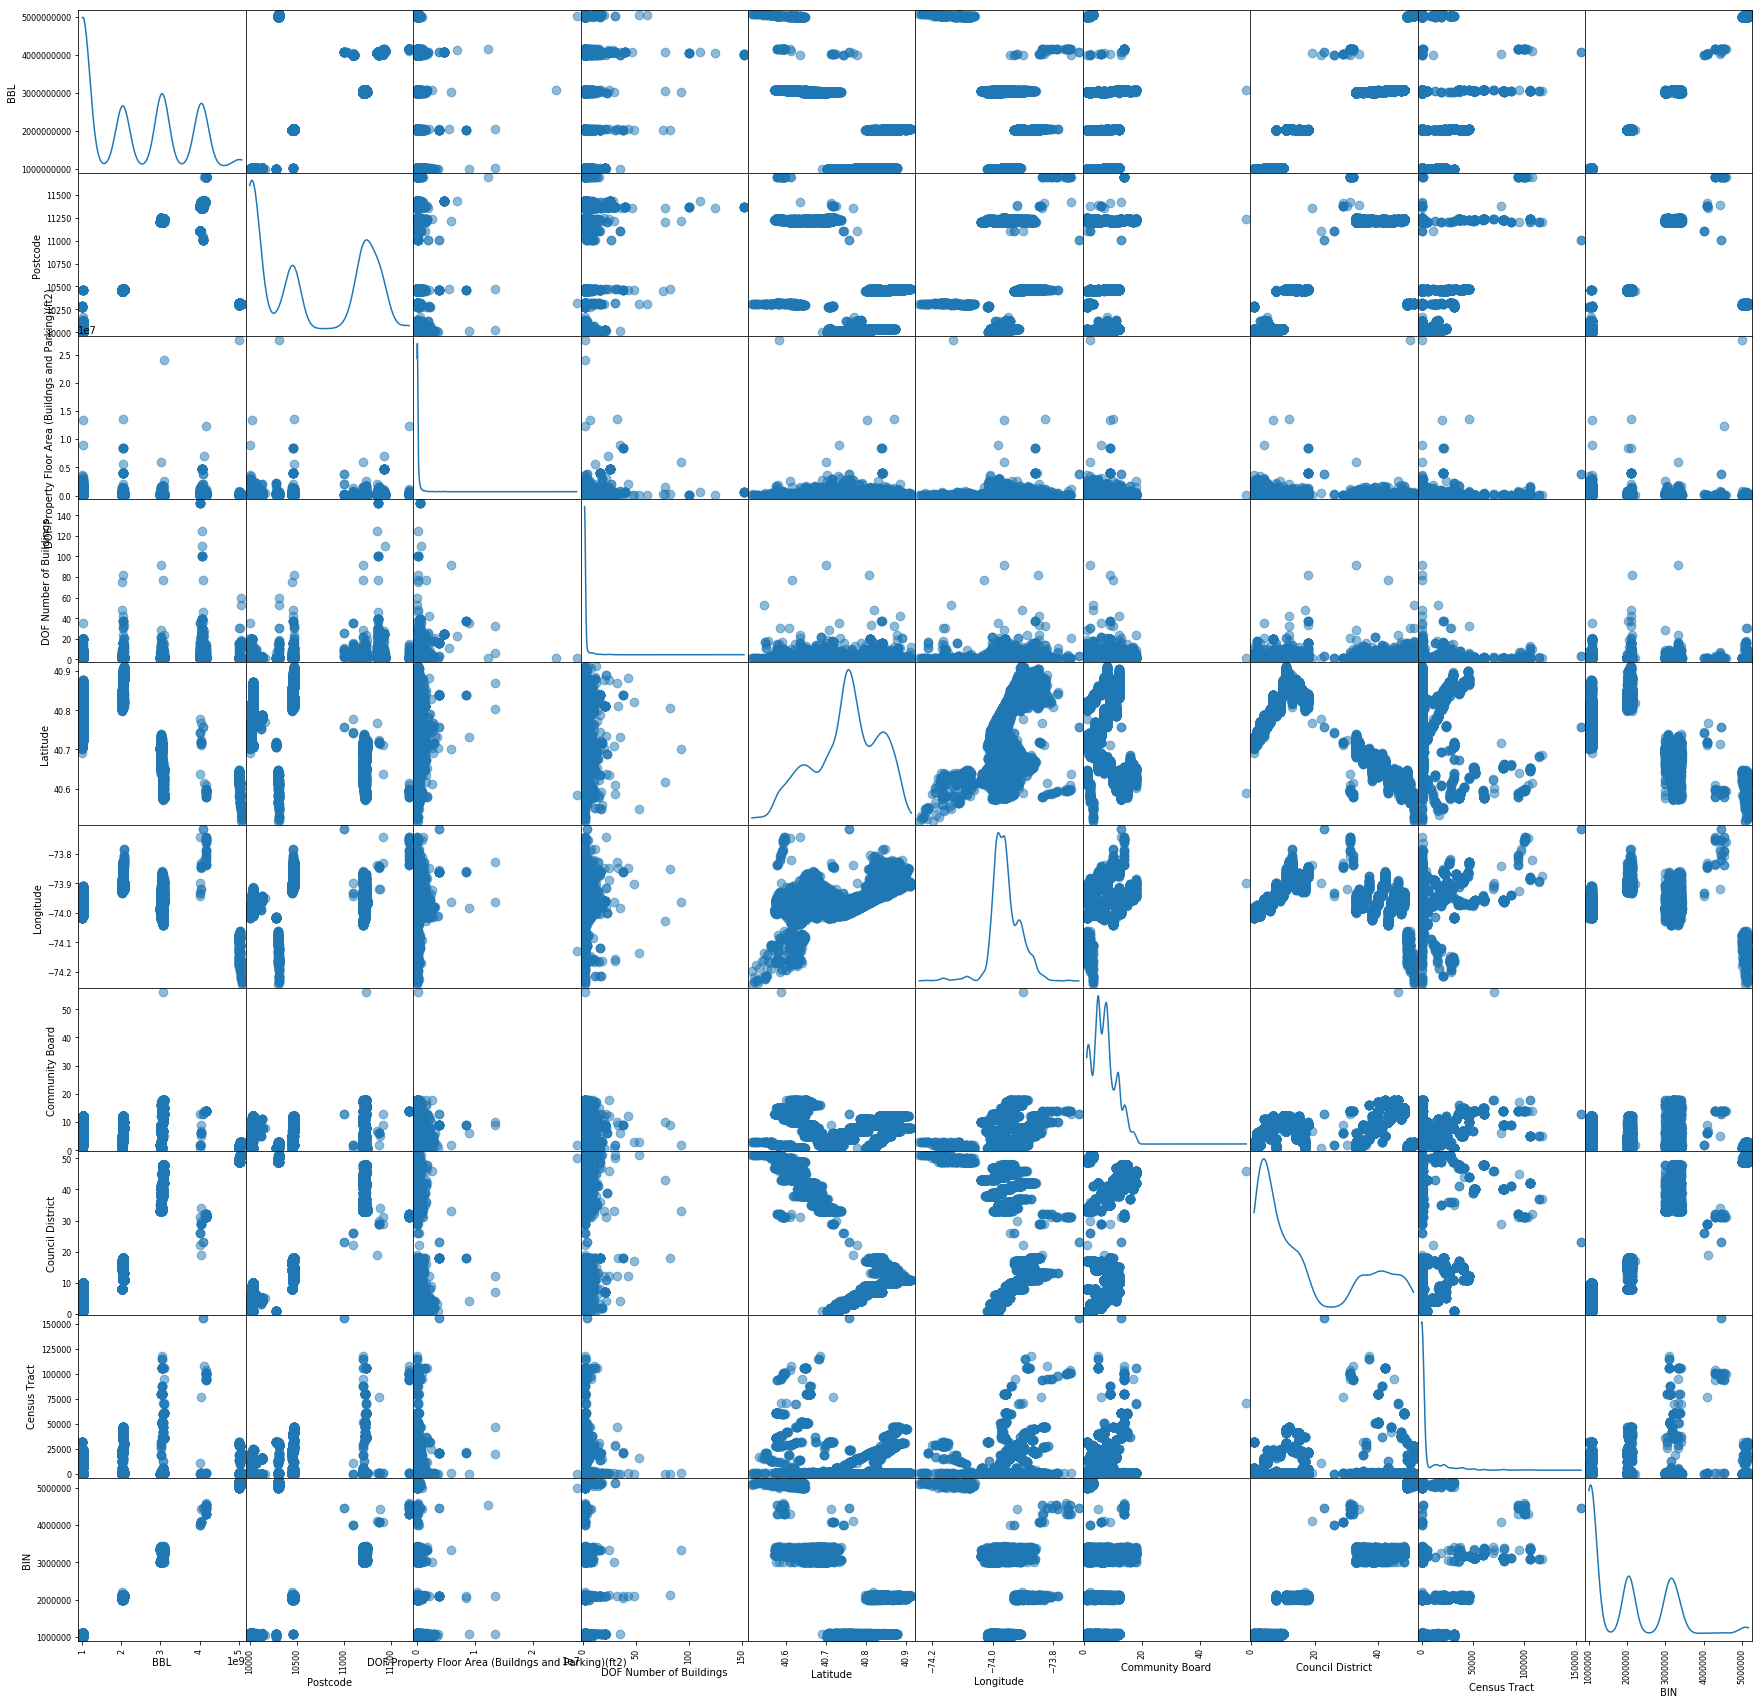

In [8]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(30, 30),diagonal='kde');

### Comment: %matplotlib inline has to be written to display the plot in jupyter notebook 

In [9]:
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
nrg.columns

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BIN', u'NTA'],
      dtype=

In [11]:
nrg.shape

(16170, 31)

In [12]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,None,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,None,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,None,0.000000e+00,None,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [13]:
bsize.columns

Index([   u'Borough',      u'Block',        u'Lot',         u'CD',
           u'CT2010',     u'CB2010', u'SchoolDist',    u'Council',
          u'ZipCode',   u'FireComp', u'PolicePrct', u'HealthArea',
        u'SanitBoro', u'SanitDistr',   u'SanitSub',    u'Address',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
         u'Overlay1',   u'Overlay2',    u'SPDist1',    u'SPDist2',
          u'SPDist3',  u'LtdHeight',  u'SplitZone',  u'BldgClass',
          u'LandUse',  u'Easements',  u'OwnerType',  u'OwnerName',
          u'LotArea',   u'BldgArea',    u'ComArea',    u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea',  u'StrgeArea',
       u'FactryArea',  u'OtherArea', u'AreaSource',   u'NumBldgs',
        u'NumFloors',   u'UnitsRes', u'UnitsTotal',   u'LotFront',
         u'LotDepth',  u'BldgFront',  u'BldgDepth',        u'Ext',
         u'ProxCode', u'IrrLotCode',    u'LotType',   u'BsmtCode',
       u'AssessLand',  u'AssessTot', u'ExemptLand',  u'ExemptT

In [14]:
bsize.shape

(42686, 88)

## I only pick up  the columns that I need for the next steps.

In [15]:
nrg = nrg[['DOF Number of Buildings','Site EUI(kBtu/ft2)','BBL','Reported Property Floor Area (Building(s)) (ft²)']]
bsize = bsize[['YearBuilt','UnitsTotal','UnitsRes','BBL']]



## Exploratory analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2099fb0350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2099d6bb90>]], dtype=object)

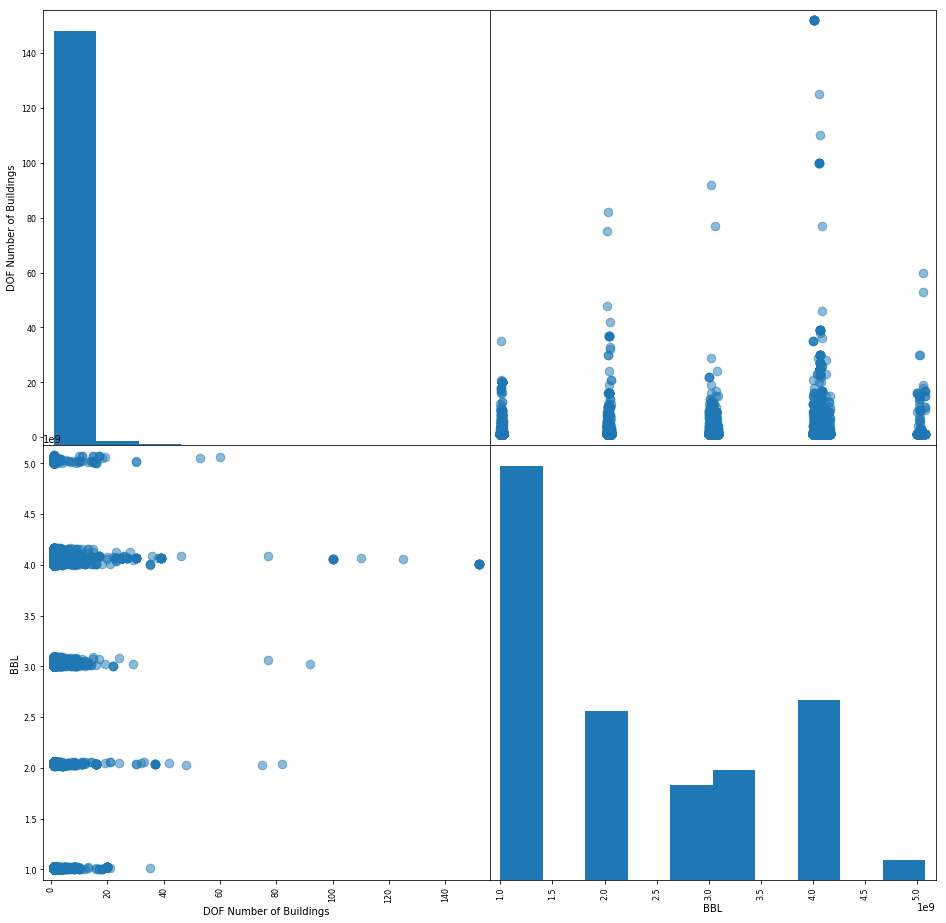

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [17]:
for i in range(len(nrg.columns)):
    nrg.iloc[:,i] = pd.to_numeric(nrg.iloc[:,i],errors='coerce')
for i in range(len(bsize.columns)):
    bsize.iloc[:,i] = pd.to_numeric(bsize.iloc[:,i],errors='coerce')

In [18]:
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
bsize.BBL.astype(float)

0        1.000010e+09
1        1.000090e+09
2        1.000158e+09
3        1.000130e+09
4        1.000010e+09
5        1.000010e+09
6        1.000130e+09
7        1.000090e+09
8        1.000030e+09
9        1.000120e+09
10       1.000030e+09
11       1.000168e+09
12       1.000160e+09
13       1.000030e+09
14       1.000120e+09
15       1.000030e+09
16       1.000030e+09
17       1.000130e+09
18       1.000090e+09
19       1.000090e+09
20       1.000300e+09
21       1.000328e+09
22       1.000318e+09
23       1.000080e+09
24       1.000290e+09
25       1.000290e+09
26       1.000390e+09
27       1.000020e+09
28       1.000350e+09
29       1.000070e+09
             ...     
42656    1.008968e+09
42657    1.010778e+09
42658    1.010478e+09
42659    1.013428e+09
42660    1.014298e+09
42661    1.014738e+09
42662    1.018878e+09
42663    1.018438e+09
42664    1.016308e+09
42665    1.018318e+09
42666    1.019448e+09
42667    1.018448e+09
42668    1.019438e+09
42669    1.019448e+09
42670    1

In [19]:
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))

TypeError: 'numpy.int64' object is not iterable

In [20]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [21]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(4688, 7)

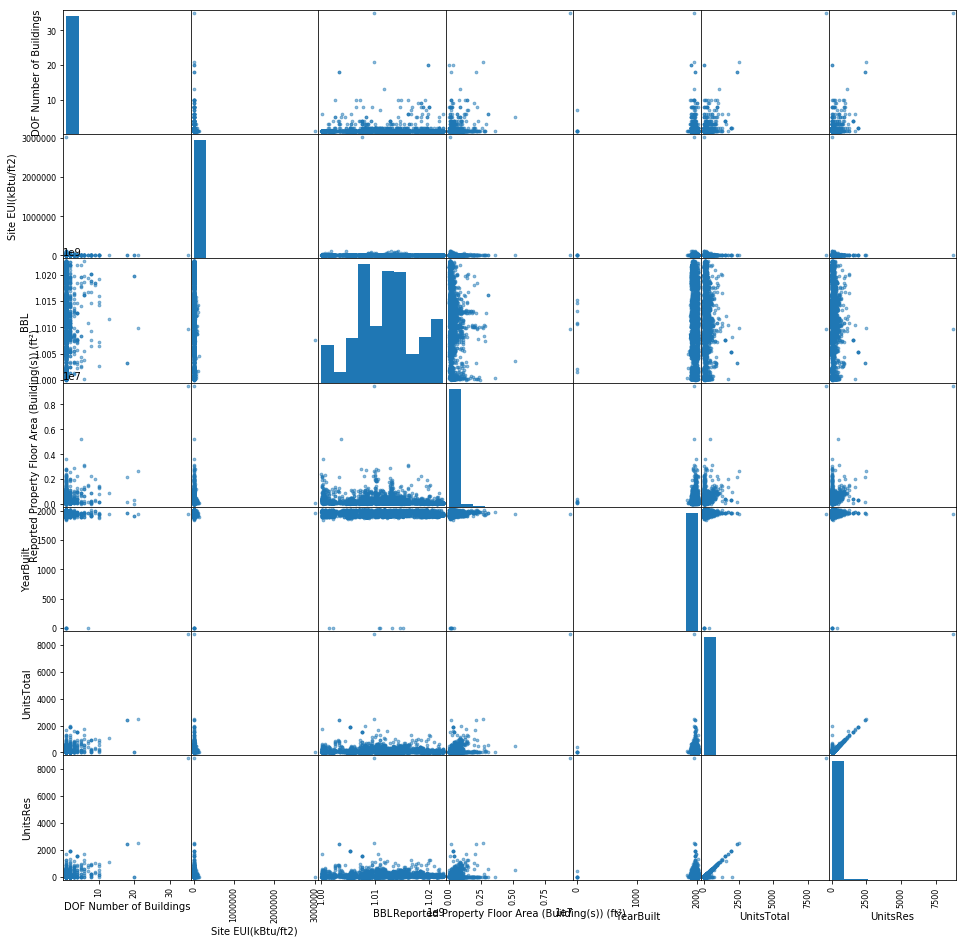

In [22]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

In [23]:
bblnrgdata.columns

Index([                         u'DOF Number of Buildings',
                                     u'Site EUI(kBtu/ft2)',
                                                    u'BBL',
       u'Reported Property Floor Area (Building(s)) (ft²)',
                                              u'YearBuilt',
                                             u'UnitsTotal',
                                               u'UnitsRes'],
      dtype='object')

In [24]:
bblnrgdata['Energy TOTAL'] = bblnrgdata['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'] * bblnrgdata['Site EUI(kBtu/ft2)']
bblnrgdata.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),YearBuilt,UnitsTotal,UnitsRes,Energy TOTAL
2,1.0,125.4,1.013110e+09,330000.0,1977,56,0,41382000.0
15,1.0,122.3,1.007660e+09,59468.0,1912,8,0,7272936.4
16,1.0,117.0,1.008150e+09,364000.0,1954,24,0,42588000.0
18,1.0,82.1,1.005050e+09,235370.0,1926,24,0,19323877.0
19,1.0,137.7,1.021420e+09,64806.0,1924,62,54,8923786.2


## Make a scatter plot first of Energy vs Units

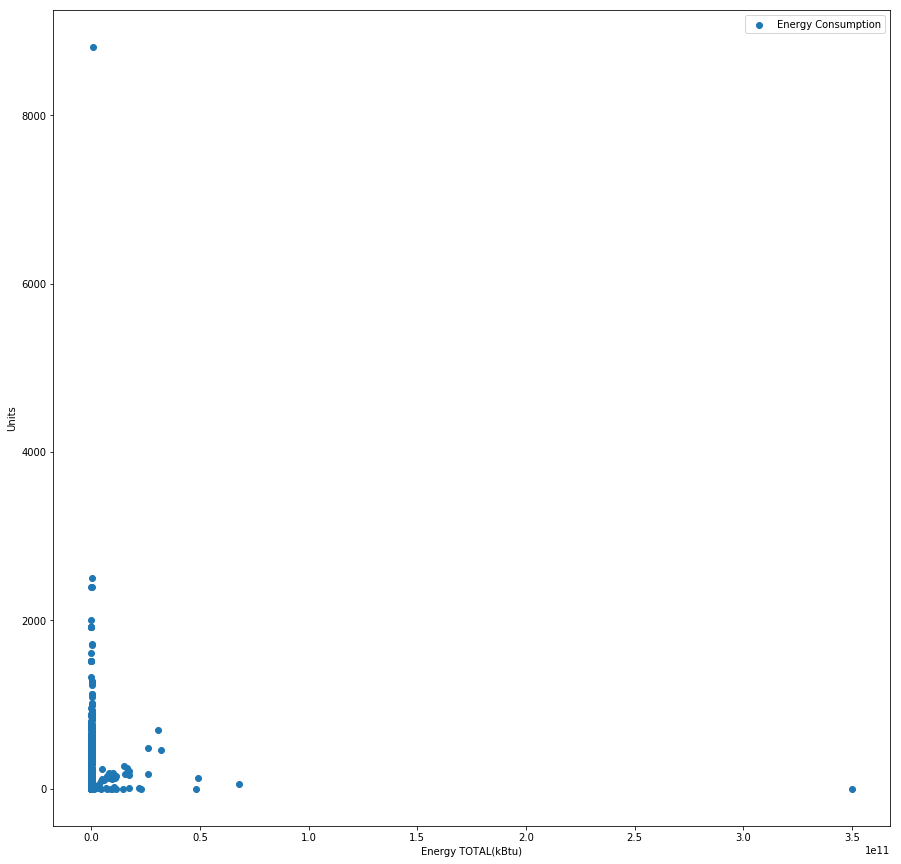

In [25]:
pl.figure(figsize=[15,15])
pl.scatter(bblnrgdata['Energy TOTAL'],bblnrgdata['UnitsTotal'],label='Energy Consumption')
pl.xlabel('Energy TOTAL(kBtu)')
pl.ylabel('Units')
pl.legend()
pl.show()

## Zoomed in scatter plot

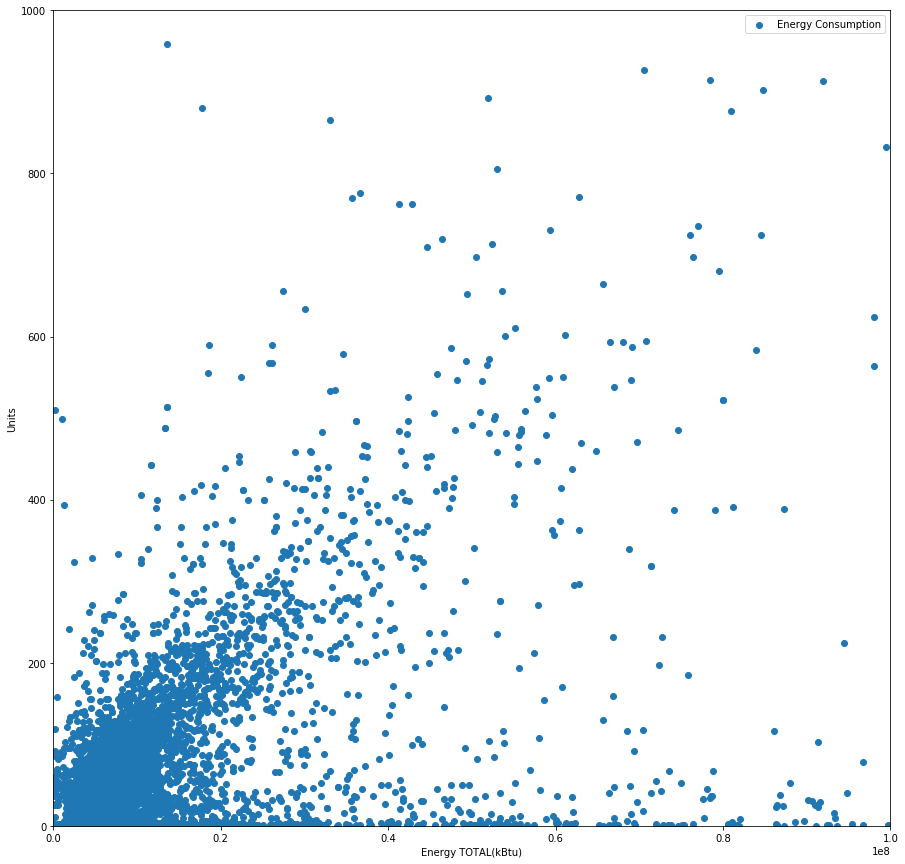

In [26]:
pl.figure(figsize=[15,15])
pl.scatter(bblnrgdata['Energy TOTAL'],bblnrgdata['UnitsTotal'],label='Energy Consumption')
pl.xlabel('Energy TOTAL(kBtu)')
pl.ylabel('Units')
pl.xlim([0,1e8])
pl.ylim([0,1000])
pl.legend()
pl.show()

In [27]:
bblnrgdata['Reported Property Floor Area (Building(s))'] = bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

In [28]:
bblnrgdata.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),YearBuilt,UnitsTotal,UnitsRes,Energy TOTAL,Reported Property Floor Area (Building(s))
2,1.0,125.4,1.013110e+09,330000.0,1977,56,0,41382000.0,330000.0
15,1.0,122.3,1.007660e+09,59468.0,1912,8,0,7272936.4,59468.0
16,1.0,117.0,1.008150e+09,364000.0,1954,24,0,42588000.0,364000.0
18,1.0,82.1,1.005050e+09,235370.0,1926,24,0,19323877.0,235370.0
19,1.0,137.7,1.021420e+09,64806.0,1924,62,54,8923786.2,64806.0


In [29]:
bblnrgdata.shape

(4688, 9)

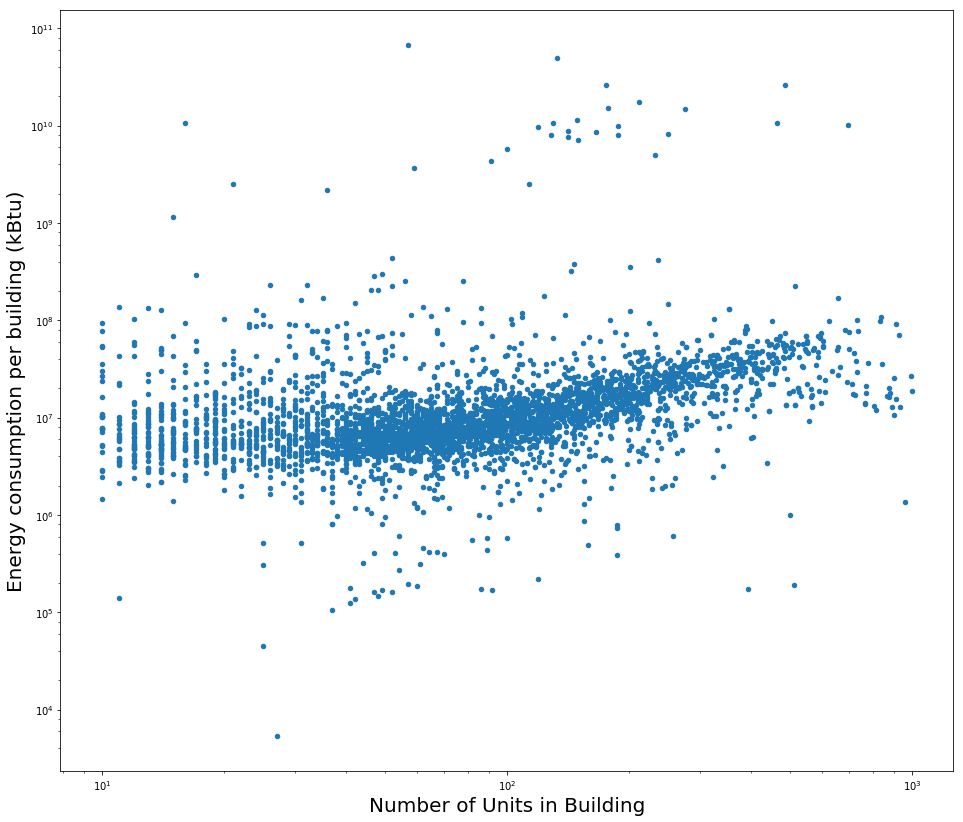

In [30]:
bblnrgdata['nrg'] = bblnrgdata['Energy TOTAL']/bblnrgdata['DOF Number of Buildings']

bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

ax = bblnrgdataCut.plot(kind='scatter', y='nrg', x='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

In [33]:
bblnrgdataCut.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),YearBuilt,UnitsTotal,UnitsRes,Energy TOTAL,Reported Property Floor Area (Building(s)),nrg
2,1.0,125.4,1.013110e+09,330000.0,1977,56,0,41382000.0,330000.0,41382000.0
16,1.0,117.0,1.008150e+09,364000.0,1954,24,0,42588000.0,364000.0,42588000.0
18,1.0,82.1,1.005050e+09,235370.0,1926,24,0,19323877.0,235370.0,19323877.0
19,1.0,137.7,1.021420e+09,64806.0,1924,62,54,8923786.2,64806.0,8923786.2
20,1.0,103.2,1.021750e+09,62839.0,1920,85,75,6484984.8,62839.0,6484984.8


In [34]:
bblnrgdataCut.shape

(3992, 10)

## 1.Fit a line to Units vs Energy.

In [35]:
bblnrgdataCut['logU'] = np.log10(bblnrgdataCut['UnitsTotal'])
bblnrgdataCut['logE'] = np.log10(bblnrgdataCut['Energy TOTAL'])
bblnrgdataCut.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),YearBuilt,UnitsTotal,UnitsRes,Energy TOTAL,Reported Property Floor Area (Building(s)),nrg,logU,logE
2,1.0,125.4,1.013110e+09,330000.0,1977,56,0,41382000.0,330000.0,41382000.0,1.748188,7.616811
16,1.0,117.0,1.008150e+09,364000.0,1954,24,0,42588000.0,364000.0,42588000.0,1.380211,7.629287
18,1.0,82.1,1.005050e+09,235370.0,1926,24,0,19323877.0,235370.0,19323877.0,1.380211,7.286094
19,1.0,137.7,1.021420e+09,64806.0,1924,62,54,8923786.2,64806.0,8923786.2,1.792392,6.950549
20,1.0,103.2,1.021750e+09,62839.0,1920,85,75,6484984.8,62839.0,6484984.8,1.929419,6.811909


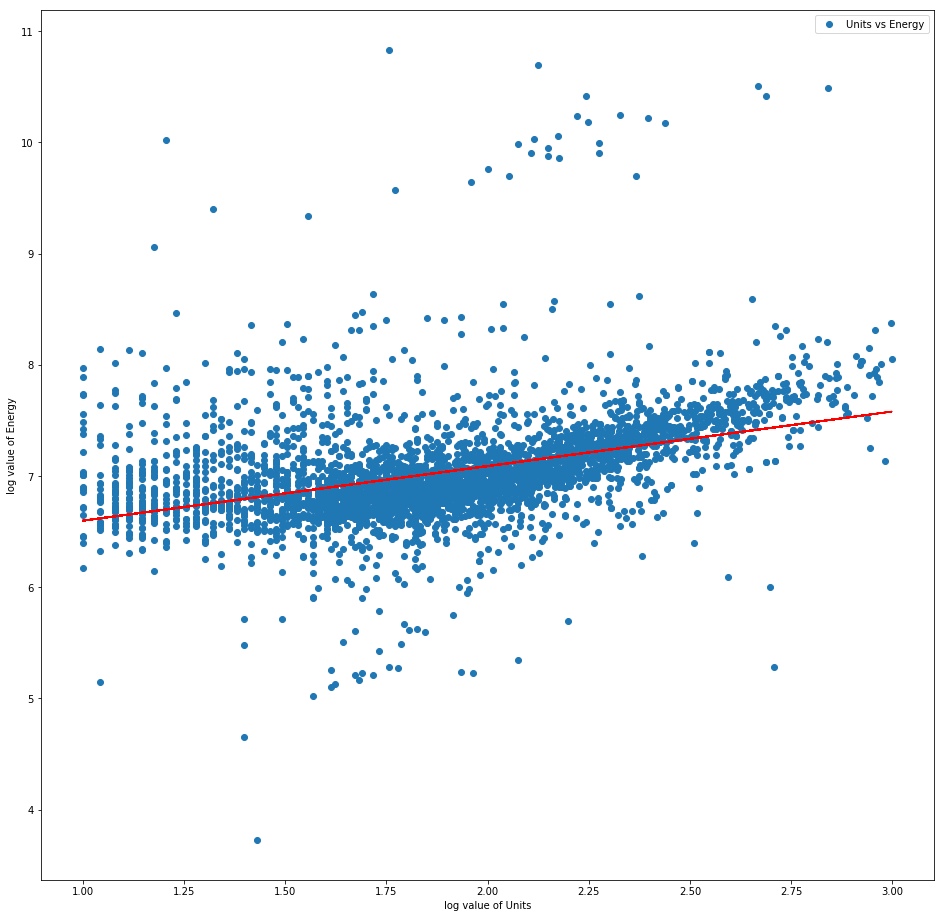

In [36]:
pl.figure(figsize=[16,16])
pl.scatter(bblnrgdataCut['logU'],bblnrgdataCut['logE'],label='Units vs Energy')
model= smf.ols(formula='logE~logU',data=bblnrgdataCut).fit()
pl.plot(bblnrgdataCut['logU'],model.predict(),'r')
pl.xlabel('log value of Units')
pl.ylabel('log value of Energy')
pl.legend()
pl.show()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logE   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Sun, 03 Dec 2017   Prob (F-statistic):          1.13e-160
Time:                        19:28:06   Log-Likelihood:                -2324.2
No. Observations:                3992   AIC:                             4652.
Df Residuals:                    3990   BIC:                             4665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1076      0.034    182.100      0.000         6.042     6.173
logU           0.4908      0.017     28.295      0.000         0.457     0.525
==============================================================================
Omnibus:                     2192.819   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48020.607
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      19.436   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.Fit a line to Energy vs Units.

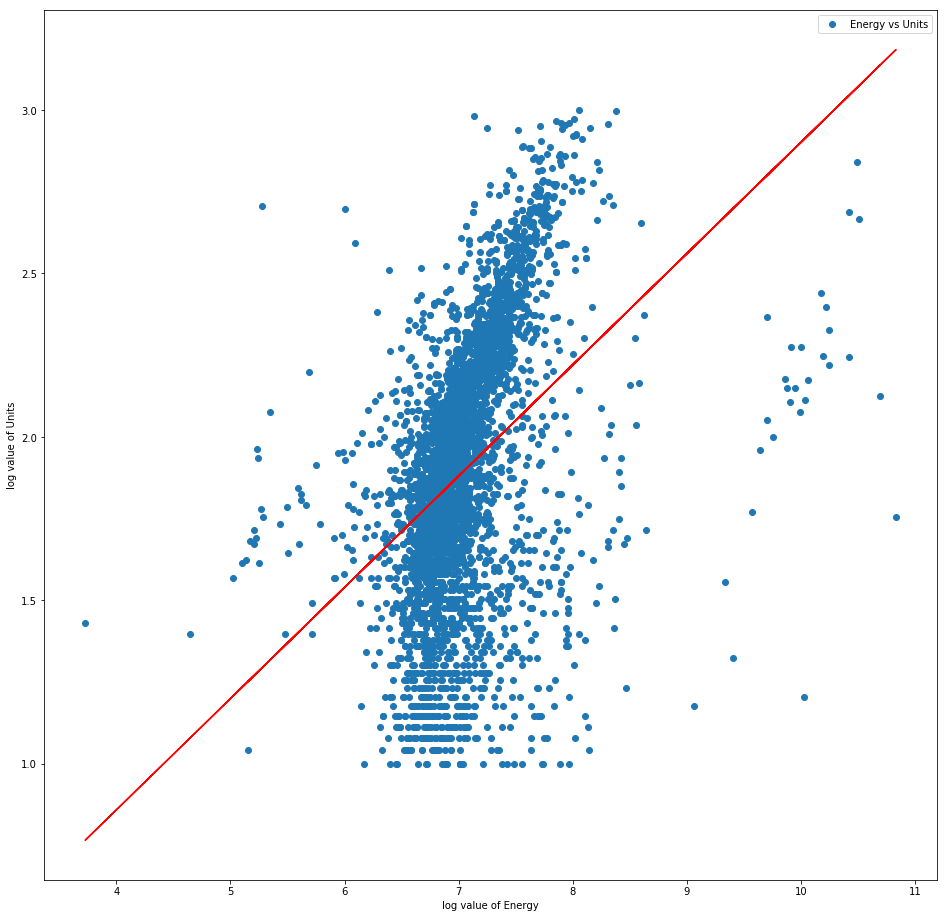

In [38]:
pl.figure(figsize=[16,16])
pl.scatter(bblnrgdataCut['logE'],bblnrgdataCut['logU'],label='Energy vs Units')
model2= smf.ols(formula='logU~logE',data=bblnrgdataCut).fit()
pl.plot(bblnrgdataCut['logE'],model2.predict(),'r')
pl.xlabel('log value of Energy')
pl.ylabel('log value of Units')
pl.legend()
pl.show()

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logU   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Sun, 03 Dec 2017   Prob (F-statistic):          1.13e-160
Time:                        19:28:10   Log-Likelihood:                -1594.5
No. Observations:                3992   AIC:                             3193.
Df Residuals:                    3990   BIC:                             3206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5032      0.085     -5.929      0.000        -0.670    -0.337
logE           0.3405      0.012     28.295      0.000         0.317     0.364
==============================================================================
Omnibus:                      153.836   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.715
Skew:                          -0.488   Prob(JB):                     5.16e-38
Kurtosis:                       3.280   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.Chisquare comparison

In [40]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [41]:
chisquareUvsE = chi2(bblnrgdataCut['logU'],model.predict(),errors = None)
chisquareUvsE

105786.17867853724

In [42]:
chisquareEvsU = chi2(bblnrgdataCut['logE'],model2.predict(),errors = None)
chisquareEvsU

106015.50288773156

## We can see that chisquareUvsE < chisquareEvsU, so the Units vs Energy model fit better.

## 4.Assume Poisson statistics for the errors on the independent variable. Poisson statistics means your uncertainty is the square root of your measurement. I wrote down the formula for the errors. Please explain why I wrote it as I did.

In [43]:
## nrg is calculated by area and EUI so we need to consider both possible errors and below is the correct way to combine both errors.
errorsnrg = np.sqrt((bblnrgdataCut['Reported Property Floor Area'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics errors in the number of units as well
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

KeyError: 'Reported Property Floor Area'

## 5.Fit a 2nd degree polynomial to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is  $y = ax^2 + bx + c$ .

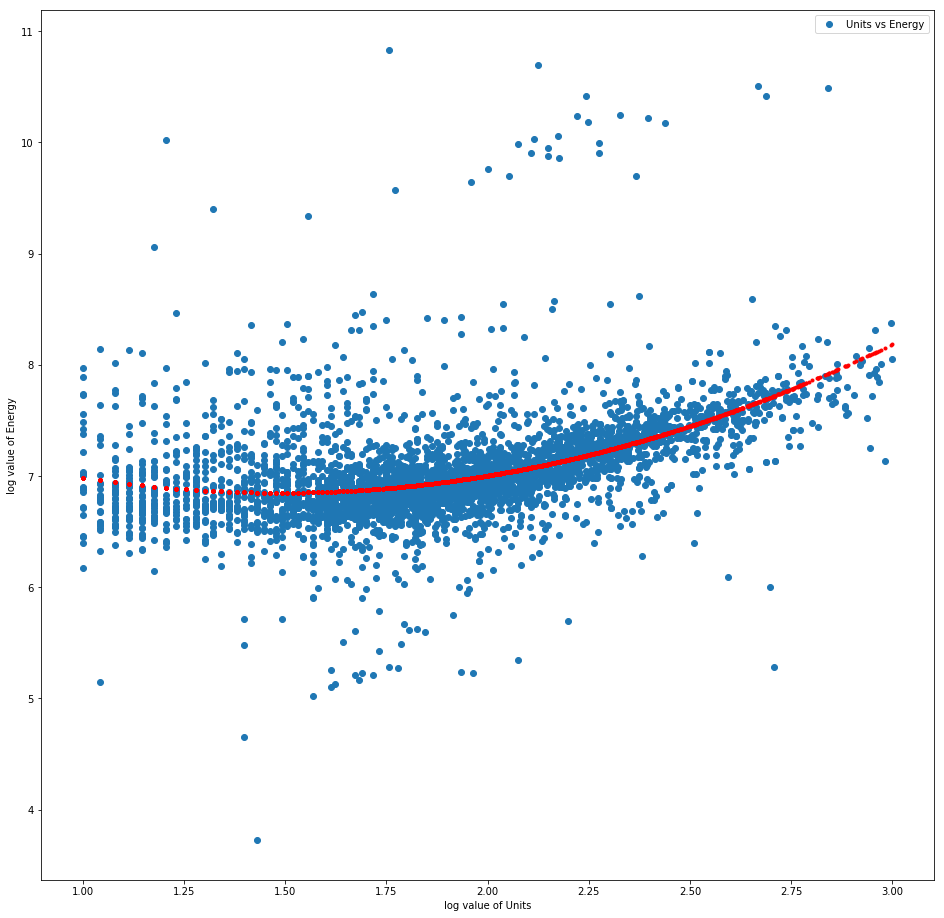

In [44]:
pl.figure(figsize=[16,16])
pl.scatter(bblnrgdataCut['logU'],bblnrgdataCut['logE'],label='Units vs Energy')
model3 = smf.ols(formula='logE~I(logU**2)+logU',data=bblnrgdataCut).fit()
pl.plot(bblnrgdataCut['logU'],model3.predict(),'r.')
pl.xlabel('log value of Units')
pl.ylabel('log value of Energy')
pl.legend()
pl.show()

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logE   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 03 Dec 2017   Prob (F-statistic):          1.12e-229
Time:                        19:30:55   Log-Likelihood:                -2161.6
No. Observations:                3992   AIC:                             4329.
Df Residuals:                    3989   BIC:                             4348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        8.1337      0.115     70.892      0.000         7.909     8.359
I(logU ** 2)     0.5824      0.032     18.399      0.000         0.520     0.645
logU            -1.7302      0.122    -14.198      0.000        -1.969    -1.491
==============================================================================
Omnibus:                     2363.734   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65676.793
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                      22.323   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.Compare the Units vs Energy line fit and the 2-nd degree polynomial fit with the Likelihood ratio test

In [46]:
print ("LR : ", -2 * (model.llf - model3.llf))
print ("LR from statsmodels:", model3.compare_lr_test(model)[0])

In [47]:
model3.compare_lr_test(model)[0]>3.84

True

## We could reject our null hypothesis that the 2-nd degree polynomial fit is not better than the Units vs Energy line fit

# Extra credit 1: calculate and plot the likelihood surface

In [48]:
bblnrgdataCut.columns

Index([                         u'DOF Number of Buildings',
                                     u'Site EUI(kBtu/ft2)',
                                                    u'BBL',
       u'Reported Property Floor Area (Building(s)) (ft²)',
                                              u'YearBuilt',
                                             u'UnitsTotal',
                                               u'UnitsRes',
                                           u'Energy TOTAL',
             u'Reported Property Floor Area (Building(s))',
                                                    u'nrg',
                                                   u'logU',
                                                   u'logE'],
      dtype='object')

In [49]:
def residuals(a,b,data):
    return np.nansum((bblnrgdataCut['logU']*a+b-bblnrgdataCut['logE'])**2/(np.sqrt(bblnrgdataCut['logE']))**2)

In [50]:
A = np.arange(-50.0,50.0,0.5)
B = np.arange(-100.0,100.0,1)
Lsurface = np.zeros((len(A),len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
        Lsurface[i][j] = residuals(a,b,bblnrgdataCut)

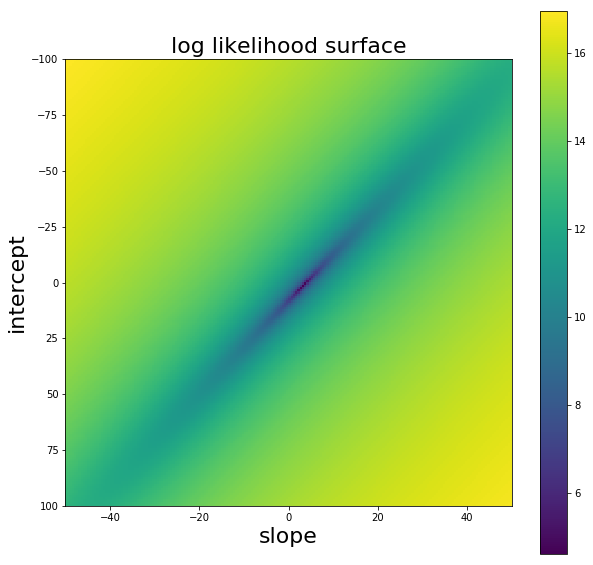

In [51]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## Extra Credit 2:

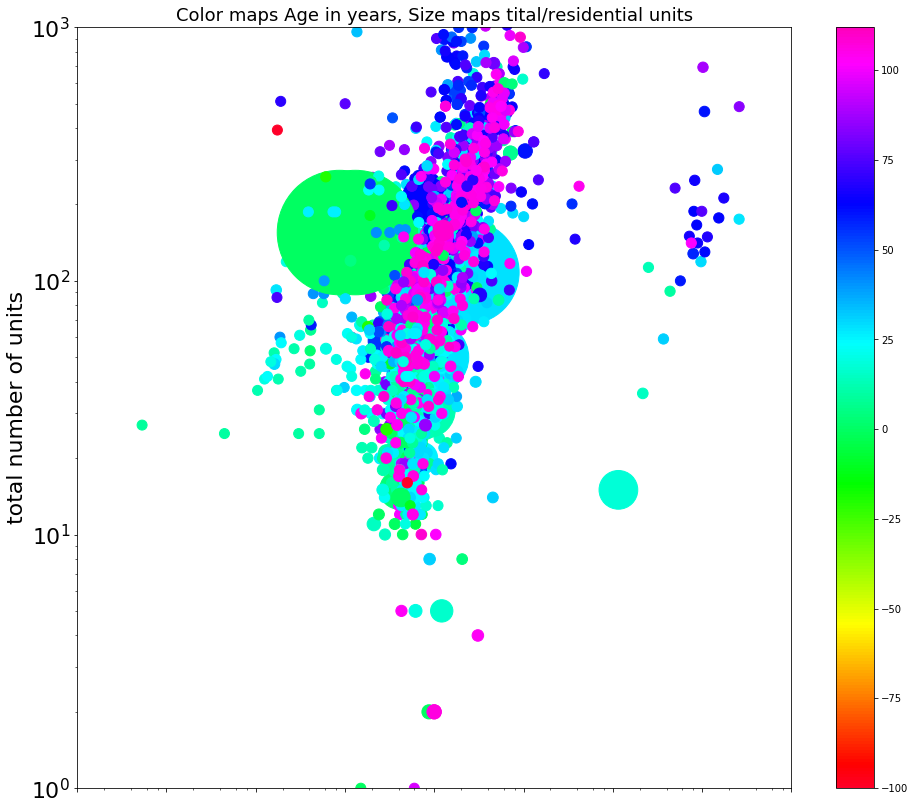

In [52]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)

Grade: 9/10 - Error in importing and displaying plots